<a href="https://colab.research.google.com/github/nicolasn892/analise-paises-api/blob/main/Analise%20de%20Pa%C3%ADses%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas necessárias

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


Consumindo a API que traz os dados dos países

In [ ]:
# Adicione o parâmetro 'fields' na URL para evitar o erro 400
url = "https://restcountries.com/v3.1/all?fields=name,population,area,region,subregion,capital,currencies,languages"
response = requests.get(url)

if response.status_code == 200:
    countries = response.json()
    # Extração robusta dos dados
    dados = []
    for pais in countries:
        nome = pais.get('name', {}).get('common')
        populacao = pais.get('population')
        area = pais.get('area')
        regiao = pais.get('region')
        subregiao = pais.get('subregion')
        capital = pais.get('capital', [None])[0] if pais.get('capital') else None
        moeda = None
        if 'currencies' in pais and pais['currencies']:
            moeda = list(pais['currencies'].values())[0].get('name')
        idiomas = None
        if 'languages' in pais and pais['languages']:
            idiomas = ', '.join(pais['languages'].values())
        dados.append({
            'nome': nome,
            'populacao': populacao,
            'area': area,
            'regiao': regiao,
            'subregiao': subregiao,
            'capital': capital,
            'moeda': moeda,
            'idiomas': idiomas
        })
    df = pd.DataFrame(dados)
    print(df.head())
else:
    print(f"Erro na API: {response.status_code}")

         nome  populacao      area   regiao       subregiao    capital  \
0        Togo    8278737   56785.0   Africa  Western Africa       Lomé   
1     Mayotte     226915     374.0   Africa  Eastern Africa  Mamoudzou   
2     Georgia    3714000   69700.0     Asia    Western Asia    Tbilisi   
3     Vanuatu     307150   12189.0  Oceania       Melanesia  Port Vila   
4  Kyrgyzstan    6591600  199951.0     Asia    Central Asia    Bishkek   

                    moeda                   idiomas  
0  West African CFA franc                    French  
1                    Euro                    French  
2                    lari                  Georgian  
3            Vanuatu vatu  Bislama, English, French  
4         Kyrgyzstani som           Kyrgyz, Russian  


Montando um DataFrame com as informações mais relevantes

In [ ]:
dados = []
for pais in countries:
    # Trata o campo 'capital' de forma segura
    if 'capital' in pais and isinstance(pais['capital'], list) and len(pais['capital']) > 0:
        capital = pais['capital'][0]
    else:
        capital = None
    # Monta o dicionário de dados
    dados.append({
        'nome': pais.get('name', {}).get('common'),
        'populacao': pais.get('population'),
        'area': pais.get('area'),
        'regiao': pais.get('region'),
        'subregiao': pais.get('subregion'),
        'capital': capital,
        'moeda': list(pais.get('currencies', {}).keys())[0] if pais.get('currencies') else None,
        'idiomas': ', '.join(list(pais.get('languages', {}).values())) if pais.get('languages') else None
    })

import pandas as pd
df = pd.DataFrame(dados)
df.head()



,nome,populacao,area,regiao,subregiao,capital,moeda,idiomas
0,Togo,8278737,56785.0,Africa,Western Africa,Lomé,XOF,French
1,Mayotte,226915,374.0,Africa,Eastern Africa,Mamoudzou,EUR,French
2,Georgia,3714000,69700.0,Asia,Western Asia,Tbilisi,GEL,Georgian
3,Vanuatu,307150,12189.0,Oceania,Melanesia,Port Vila,VUV,"Bislama, English, French"
4,Kyrgyzstan,6591600,199951.0,Asia,Central Asia,Bishkek,KGS,"Kyrgyz, Russian"


Fazendo análises e visualizações  

Top 10 países mais populosos

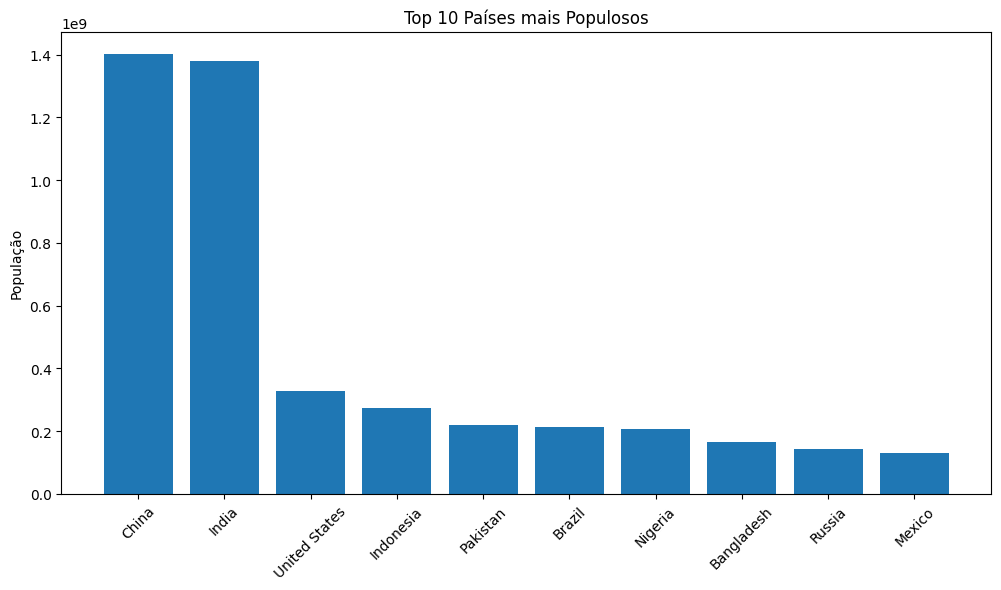

In [ ]:
top_pop = df.nlargest(10, 'populacao')
plt.figure(figsize=(12,6))
plt.bar(top_pop['nome'], top_pop['populacao'])
plt.title('Top 10 Países mais Populosos')
plt.ylabel('População')
plt.xticks(rotation=45)
plt.show()


Distribuição de países por região

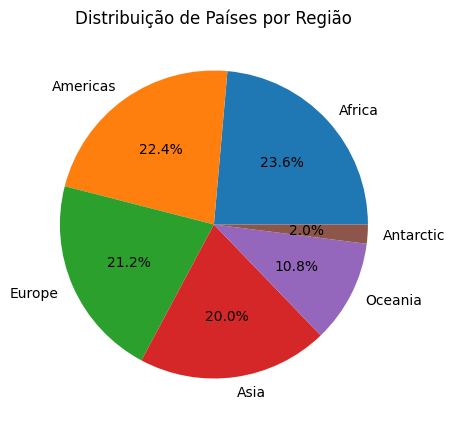

In [ ]:
plt.figure(figsize=(8,5))
df['regiao'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Países por Região')
plt.ylabel('')
plt.show()
